## Problem Statement

#### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. **Wellness Tourism Package**. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

**This time company wants to harness the available data of existing and potential customers to target the right customers.**

You as a Data Scientist at "Visit with us" travel company has to **analyze the customers' data and information to provide recommendations to the Policy Maker** and **build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.**

#### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

#### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# display all columns
pd.set_option('display.max_columns',None)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Reading the dataset

In [2]:
tour = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')

In [3]:
# copying data to another varaible to avoid any changes to original data
data = tour.copy()

### Understand the shape of the dataset.

In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 4888 rows and 20 columns.


### Displaying the first and last 5 rows of the dataset

In [5]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### Key Observations
* ProdTaken is Target Variable
* There are 8 features with null values (Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome)
* CustomerID is a sequence # and can be deleted
* Following variables seems categorical in nature - TypeofContact, CityTier, Occupation, Gender, NumberOfPersonVisiting, NumberOfFollowups, ProductPitched, PreferredPropertyStar, MaritalStatus, Passport, PitchSatisfactionScore, OwnCar, NumberOfChildrenVisiting, Designation
* Following variables seems continuous in nature - Age, DurationOfPitch, NumberOfTrips, MonthlyIncome

#### Delete Customer ID

In [8]:
data.drop(['CustomerID'],axis=1,inplace=True)

### Check for duplicate values

In [9]:
data.duplicated().sum()

141

* There are 141 duplicate rows, lets get rid of them

In [10]:
data.drop_duplicates(inplace=True)

### Check the categorical variables including target variable

In [11]:
cat_cols = ['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
            'NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport',
            'PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']
for cols in cat_cols:
    print(data[cols].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print("-" * 50)

0    81.2%
1    18.8%
Name: ProdTaken, dtype: object
--------------------------------------------------
Self Enquiry       70.9%
Company Invited    29.1%
Name: TypeofContact, dtype: object
--------------------------------------------------
1    65.3%
3    30.8%
2     4.0%
Name: CityTier, dtype: object
--------------------------------------------------
Salaried          48.3%
Small Business    42.7%
Large Business     8.9%
Free Lancer        0.0%
Name: Occupation, dtype: object
--------------------------------------------------
Male       59.7%
Female     37.3%
Fe Male     3.0%
Name: Gender, dtype: object
--------------------------------------------------
3    49.2%
2    28.7%
4    21.3%
1     0.7%
5     0.1%
Name: NumberOfPersonVisiting, dtype: object
--------------------------------------------------
4.0    42.5%
3.0    30.2%
5.0    15.8%
2.0     4.8%
1.0     3.7%
6.0     2.9%
Name: NumberOfFollowups, dtype: object
--------------------------------------------------
Basic           37.

#### Key Observations: 
* ProdTaken - 81.2% of customers took the package, 18.8% did not take
* TypeOfContact - 70.9% of customers contacted themselves vs 29.1% were invited by Company
* CityTier - 65.3% customers belongs to Tier1, followed by 30.8% in Tier3, and only 4% in Tier2
* Occupation - 48.3% are salaried, followed by 42.7% own small business, 8.9% Large business
* Gender - 59.7% are Male customers and remaining are Female customers (Female and Fe Male are same, need to fix it)
* NumberOfPersonVisiting - 49.2% of customers travel with 3 persons, 28.7% travel with 2 person, and 21.3% travel with 4 persons
* NumberOfFollowups - For 42.5% of customers cases 4 follow ups were done, followed by 30.2% with 3 follow ups were done. 
* ProductPitched - 37.9% customers preferred Basic package, 35.5% selected Deluxe and 15% selected Standard. 
* PreferredPropertyStar - 61.5% customers prefer 3 star property, followed by 19.9% customer prefer 5 star property
* MaritalStatus - 48%% customers are married. Other categories are almost in the same range
* Passport - 71% customers do not have passport
* PitchSatisfactionScore - 30.1% customers rated Sales pitch score as 3. Other categories are in similar range
* OwnCar - 61.8% customers own their own cars
* NumberOfChildrenVisiting - 43% customers are taking 1 child, 27.8% taking 2 children and only 6.9% customers taking 3 children of age less than 5 yrs. 22.3% customers do not take any child
* Designation - 37.9% customers are executive, 35.5% are Managers, 15% are Senior Managers, 6.8% as AVP and 4.7% as VP

#### Lets fix the Gender

In [12]:
data['Gender'] = data['Gender'].replace('Fe Male','Female')

### Summary of the dataset.

In [13]:
num_cols = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4531.0,37.585522,9.328723,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4501.0,15.510998,8.535634,5.0,9.0,13.0,20.0,127.0
NumberOfTrips,4609.0,3.233239,1.847851,1.0,2.0,3.0,4.0,22.0
MonthlyIncome,4523.0,23602.239443,5385.503223,1000.0,20337.0,22311.0,25535.5,98678.0


#### Key Observations
* Age - Average age of customer is 37.58 which is very close to the median age of 36. Minimum age of customer is 18 and maximum age is 61
* DurationOfPitch - On average customers spent 15.51 minutes (minutes assumed), max duration is 127 minutes. 75% of customers spent less than 20 minutes.
* NumberOfTrips - Average number of trips by customers is 3. There is at least one customer who has done 22 trips. Minimum trip is 1
* MonthlyIncome - Average income of customers is 23,602 which is very close to median 22,311. At least one customer has income of 98,678. Minimum Monthly income is 1000

### Exploratory Data Analysis

### Univariate analysis

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 4))
    else:
        plt.figure(figsize=(n + 1, 4))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observation on ProdTaken

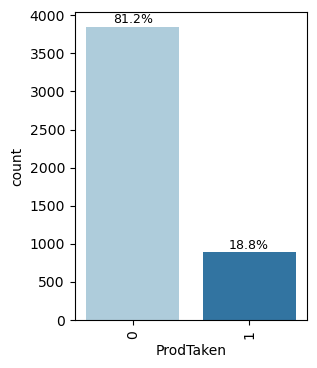

In [15]:
labeled_barplot(data,"ProdTaken",perc=True)

* 81.2% of customers purchased the package, 18.8% did not take

#### Observation on TypeofContact

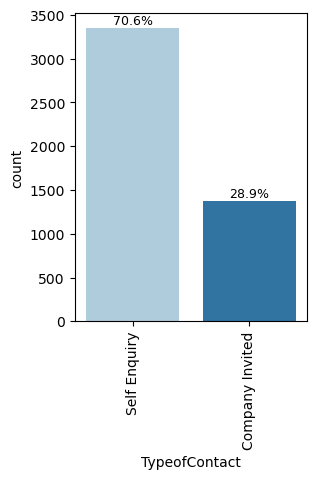

In [16]:
labeled_barplot(data,"TypeofContact",perc=True)

* 70.6% of customers contacted themselves and 28.9% of customers were invited by Company

#### Observation on CityTier

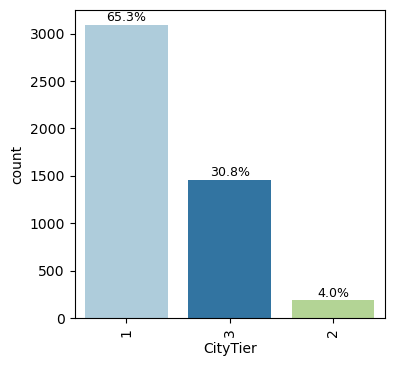

In [17]:
labeled_barplot(data,"CityTier",perc=True)

* 65.3% of customers belong to Tier1 city, followed by 30.8% belonging to Tier 3 and only 4% belong to Tier2 city

#### Observation on Occupation

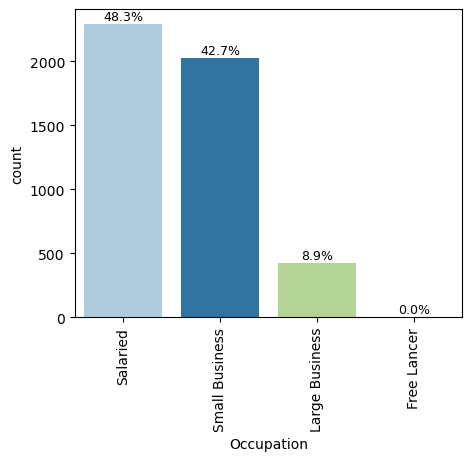

In [18]:
labeled_barplot(data,"Occupation",perc=True)

* 48.3% customers are salaried followed by 42.7% own small business, 8.9% have large business

#### Observation on Gender

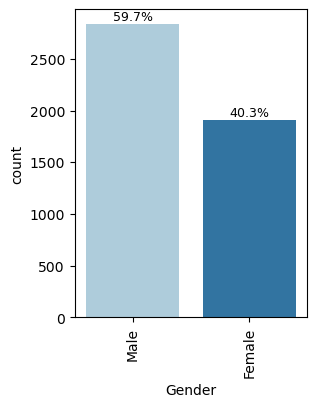

In [19]:
labeled_barplot(data,"Gender",perc=True)

* 59.7% customers are Male and 40.3% customers are female

#### Observation on NumberOfPersonVisiting

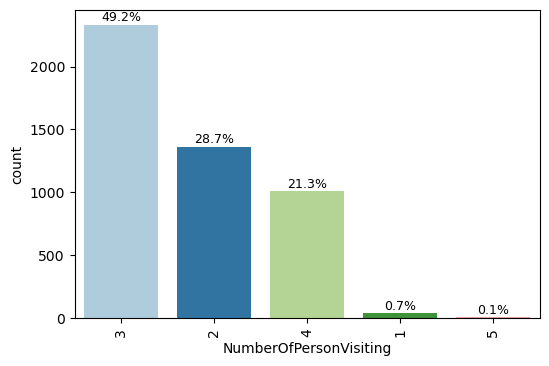

In [20]:
labeled_barplot(data,"NumberOfPersonVisiting",perc=True)

* 49.2% of customers travel with 3 persons, 28.7% travel with 2 person, and 21.3% travel with 4 persons

#### Observation on NumberOfFollowups

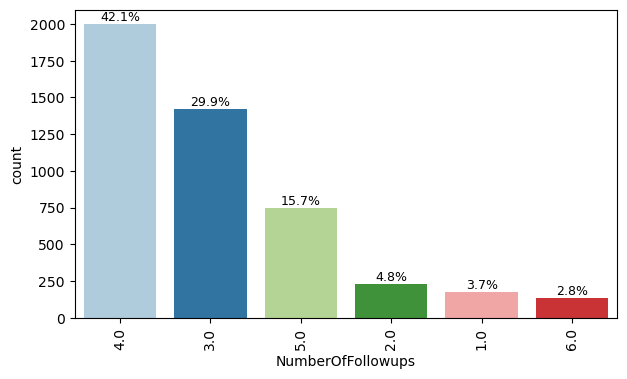

In [21]:
labeled_barplot(data,"NumberOfFollowups",perc=True)

* For 42.1% of customers 4 follow ups were done, followed by 29.9% with 3 follow ups were done. 

#### Observation on ProductPitched

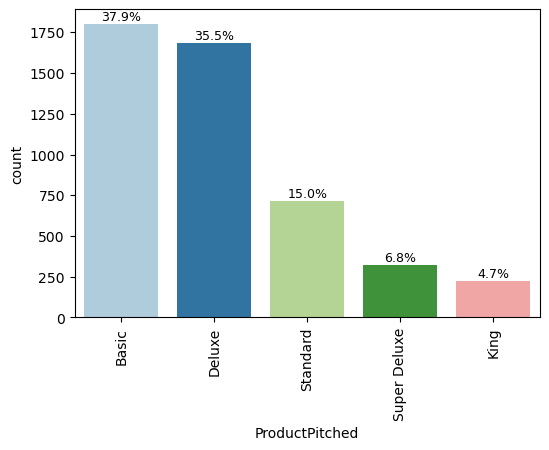

In [22]:
labeled_barplot(data,"ProductPitched",perc=True)

* 37.9% customers were pitched Basic product, 35.5% customers Deluxe, 15% customers Sandard, 6.8% customers Super Deluxe and 4.7% customers as King

#### Observation on PreferredPropertyStar

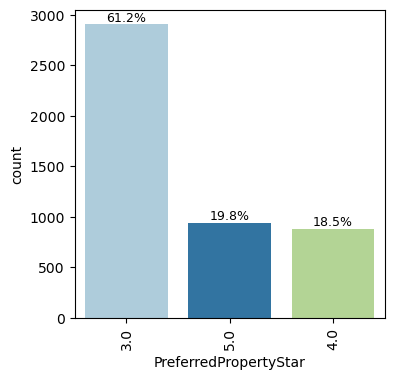

In [23]:
labeled_barplot(data,"PreferredPropertyStar",perc=True)

* 61.2% customers rated hotels property as 3, 19.8% rated them 5, and 18.5% rated them 4

#### Observation on MaritalStatus

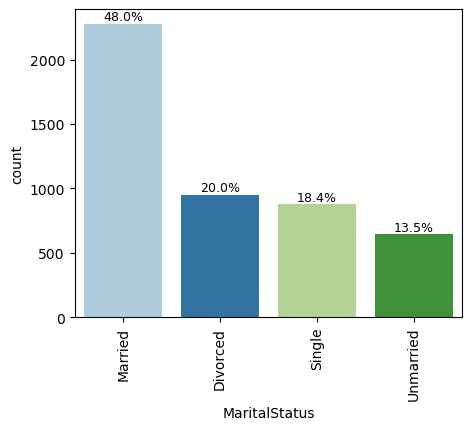

In [24]:
labeled_barplot(data,"MaritalStatus",perc=True)

* 48% customers are married followed by 20% who are Divorced, 18.4% are single and 13.5% are unmarried

#### Observation on Passport

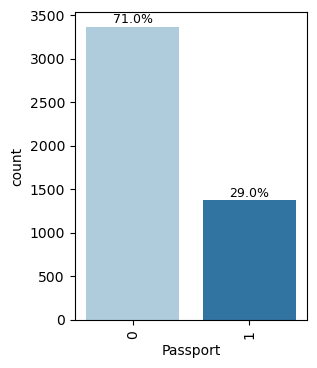

In [25]:
labeled_barplot(data,"Passport",perc=True)

* 71% customers do not have passport

#### Observation on PitchSatisfactionScore

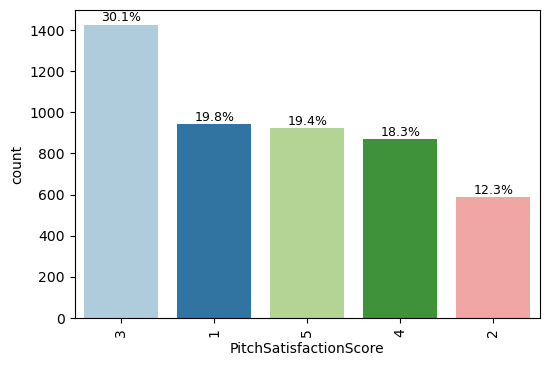

In [26]:
labeled_barplot(data,"PitchSatisfactionScore",perc=True)

* 30.1% cutomers rated sales pitch at 3, 19.8% rated 1, 19.4% rated 5, 18.3% rated 4 and 12.3% rated 2

#### Observation on OwnCar

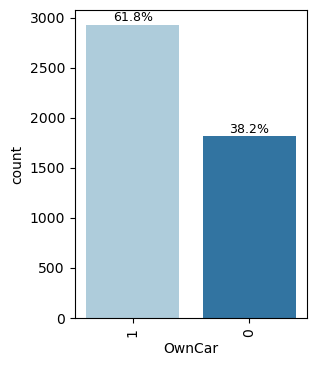

In [27]:
labeled_barplot(data,"OwnCar",perc=True)

* 61.8% customers own car, 38.2% do not own car

#### Observation on NumberOfChildrenVisiting

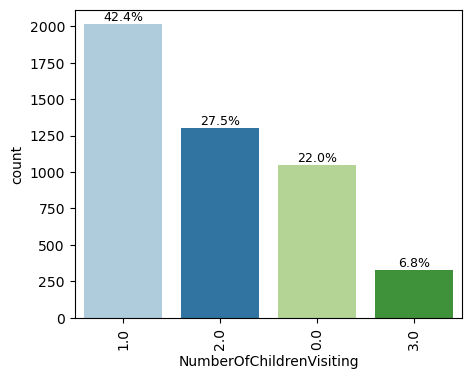

In [28]:
labeled_barplot(data,"NumberOfChildrenVisiting",perc=True)

* 42.4% customers had 1 child accompany them, 27.5% customers had 2 children on trip, 22% went without any child, 6.8% customers went with 3 children

#### Observation on Designation

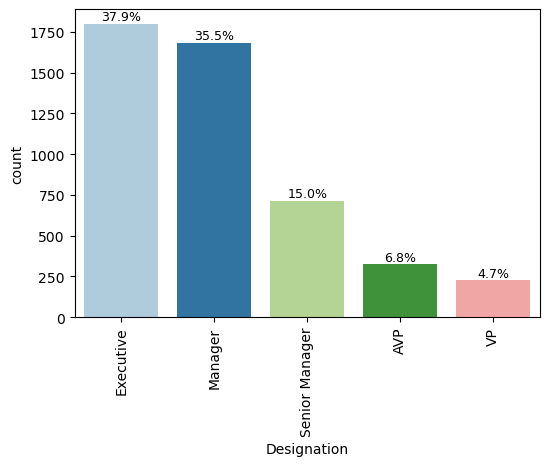

In [29]:
labeled_barplot(data,"Designation",perc=True)

* 37.9% customers are Executive, 35.5% are Managers, 15% are Senior Managers, 6.8% are AVP and 4.7% customers are VP

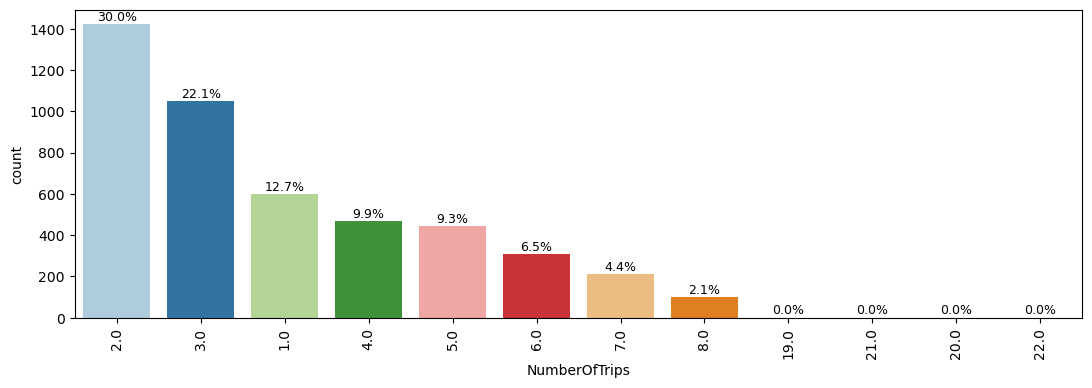

In [30]:
labeled_barplot(data,"NumberOfTrips",perc=True)

* 30% of customers went to trip 2 times, 22.1% of customers went 3 times, and 12.7% of customers went on trip just once. There are about 9.9% of customer who went 4 times and 9.3% of customers who went 5 times

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(6,5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Age

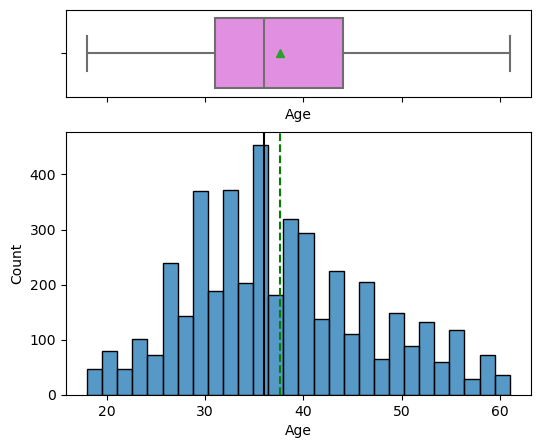

In [32]:
histogram_boxplot(data,'Age')

* There are no outliers. 
* Age follows sort of normal distribution
* Mean and Median are very close to each other

#### Observations on DurationOfPitch

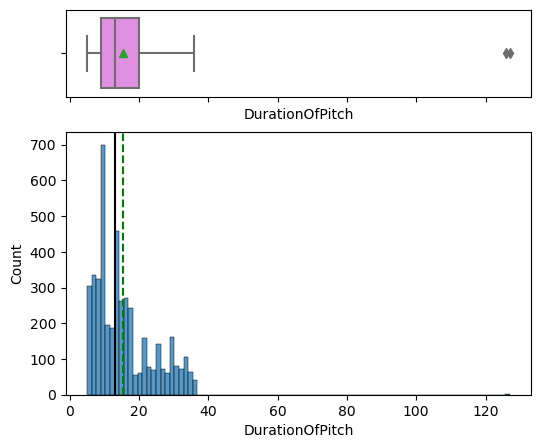

In [33]:
histogram_boxplot(data,'DurationOfPitch')

* Duration Of Pitch has outliers on the higher side
* Some customers really took around 120 minutes

#### Observations on NumberOfTrips

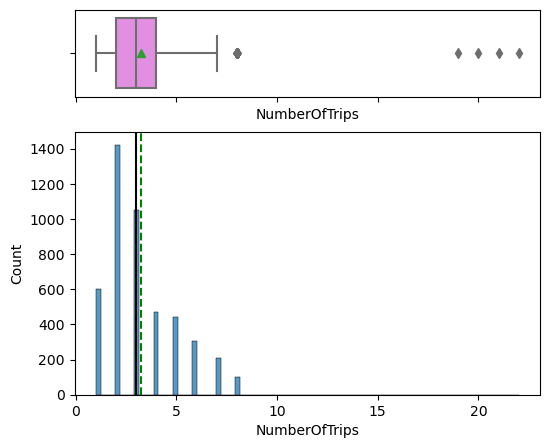

In [34]:
histogram_boxplot(data,'NumberOfTrips')

* Some customers took more than 18 trips
* data has outliers on the higher side

#### Observations on MonthlyIncome

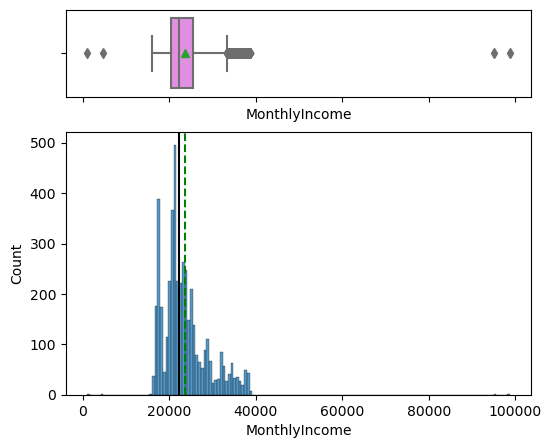

In [35]:
histogram_boxplot(data,'MonthlyIncome')

* Monthly income has outliers on both lower and higher side
* some customers have very high income

### Bivariate Analysis

#### categorical variables vs target variables 

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3,3))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### TypeofContact vs ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3831  891  4722
Self Enquiry     2753  597  3350
Company Invited  1078  294  1372
------------------------------------------------------------------------------------------------------------------------


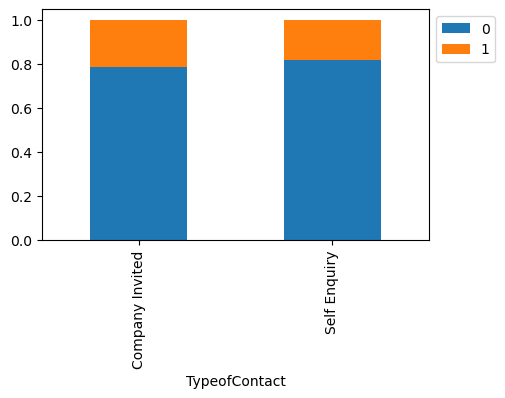

In [37]:
stacked_barplot(data,'TypeofContact','ProdTaken')

* Customers who were invited by company have taken more tour package

#### CityTier vs ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3853  894  4747
1          2592  506  3098
3          1115  346  1461
2           146   42   188
------------------------------------------------------------------------------------------------------------------------


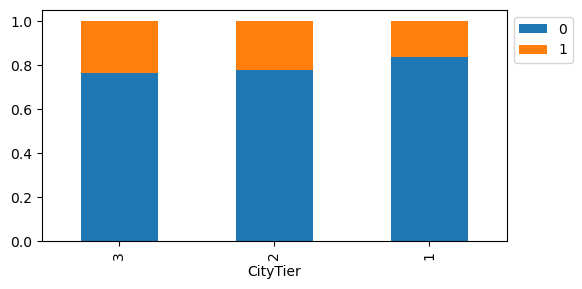

In [38]:
stacked_barplot(data,'CityTier','ProdTaken')

* Customers who live in Tier 3 and Tier 2, took tour package more than customers living in Tier1

#### Occupation vs ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3853  894  4747
Salaried        1893  400  2293
Small Business  1654  374  2028
Large Business   306  118   424
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


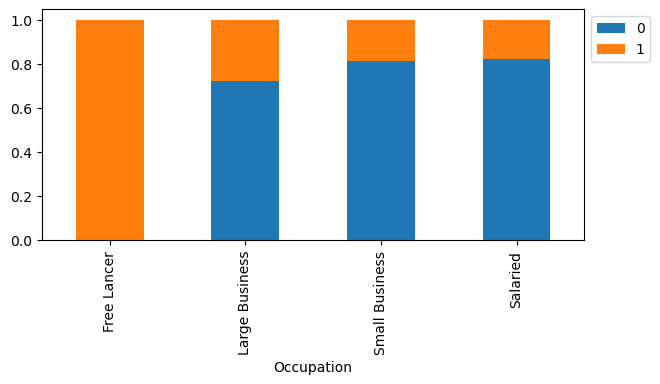

In [39]:
stacked_barplot(data,'Occupation','ProdTaken')

* As per the provided data, Free Lancing customers buys tour package. (there are just 2 customer with occupation Free Lancer) Large Business Customers buys tour package compared to other occupation. Customers with occupation Small Business and Salaried are similar in terms of buying tour package. 

#### Gender vs ProdTaken

ProdTaken     0    1   All
Gender                    
All        3853  894  4747
Male       2273  562  2835
Female     1580  332  1912
------------------------------------------------------------------------------------------------------------------------


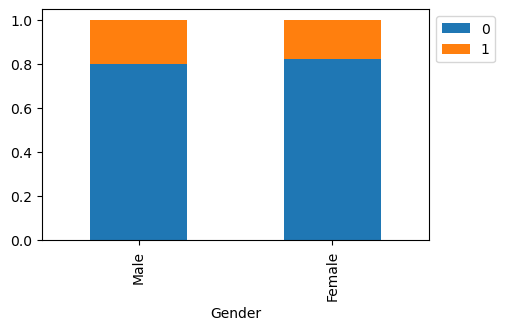

In [40]:
stacked_barplot(data,'Gender','ProdTaken')

* Per the data, Male customers are more likely to buy Tour package

#### NumberOfPersonVisiting vs ProdTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3853  894  4747
3                       1889  447  2336
2                       1108  256  1364
4                        818  191  1009
1                         35    0    35
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


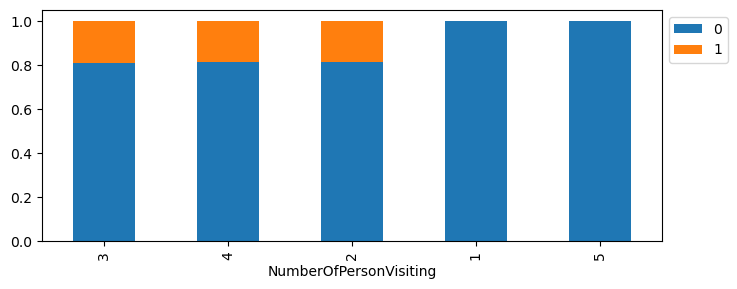

In [41]:
stacked_barplot(data,'NumberOfPersonVisiting','ProdTaken')

* Number of customer visiting with 2, 3 and 4 participants are likely to buy tour package. There are no customers with 1 and 5 participants did not buy tour package

#### NumberOfFOllowups vs ProdTaken

ProdTaken             0    1   All
NumberOfFollowups                 
All                3817  886  4703
4.0                1632  367  1999
3.0                1187  234  1421
5.0                 557  188   745
6.0                  82   53   135
2.0                 204   24   228
1.0                 155   20   175
------------------------------------------------------------------------------------------------------------------------


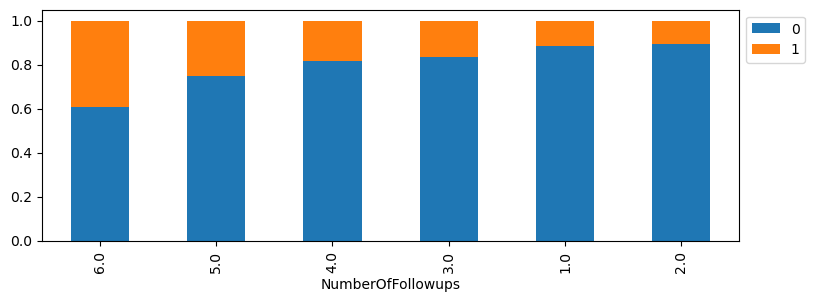

In [42]:
stacked_barplot(data,'NumberOfFollowups','ProdTaken')

* From the data, it looks like number of followups influenced customers to buy tour package positively. 

#### ProductPitched vs ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3853  894  4747
Basic           1260  540  1800
Deluxe          1486  198  1684
Standard         594  120   714
King             205   20   225
Super Deluxe     308   16   324
------------------------------------------------------------------------------------------------------------------------


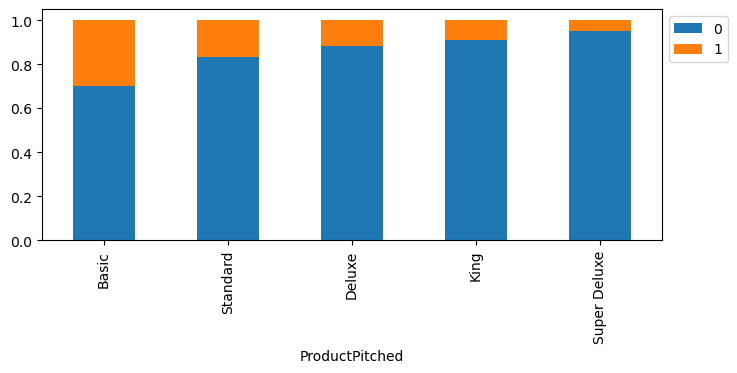

In [43]:
stacked_barplot(data,'ProductPitched','ProdTaken')

* Customers are more likely to purchase tour package for Basic, Standard and Deluxe products

#### PreferredPropertyStar vs ProdTaken

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3833  888  4721
3.0                    2435  470  2905
5.0                     696  242   938
4.0                     702  176   878
------------------------------------------------------------------------------------------------------------------------


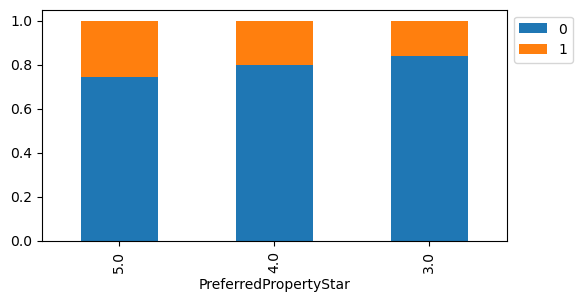

In [44]:
stacked_barplot(data,'PreferredPropertyStar','ProdTaken')

* Customers who bought tour package rated higher for properties

#### MaritalStatus vs ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3853  894  4747
Married        1965  314  2279
Single          578  297   875
Unmarried       484  159   643
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


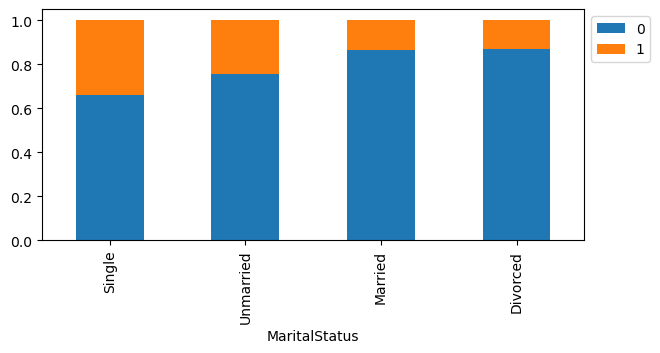

In [45]:
stacked_barplot(data,'MaritalStatus','ProdTaken')

* As per the data, SIngle and Unmarried customers bought more tour package compared to Married and Divorced customers

#### Passport vs ProdTaken

ProdTaken     0    1   All
Passport                  
All        3853  894  4747
1           895  480  1375
0          2958  414  3372
------------------------------------------------------------------------------------------------------------------------


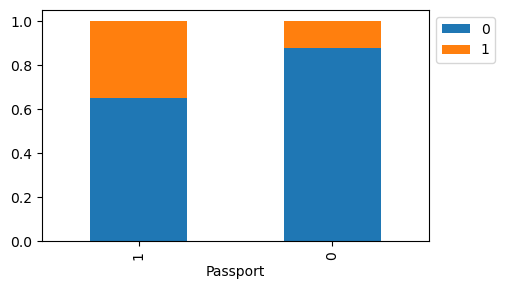

In [46]:
stacked_barplot(data,'Passport','ProdTaken')

* Customers with passport bought more tour package 

#### PitchSatisfactionScore vs ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3853  894  4747
3                       1123  304  1427
5                        725  198   923
4                        709  160   869
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


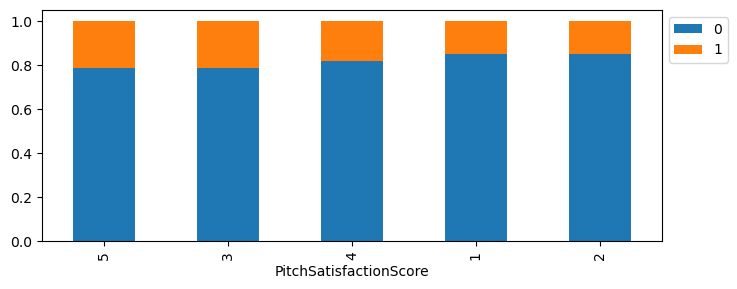

In [47]:
stacked_barplot(data,'PitchSatisfactionScore','ProdTaken')

* Customers who rated 5, 3 and 5 as pitch satisfaction score, bought more tour package

#### OwnCar vs ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3853  894  4747
1          2390  542  2932
0          1463  352  1815
------------------------------------------------------------------------------------------------------------------------


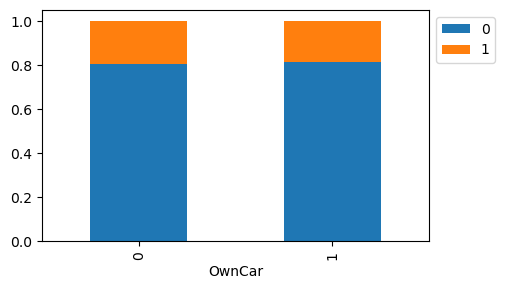

In [48]:
stacked_barplot(data,'OwnCar','ProdTaken')

* Buying of tour package doesn't seem to be impacted if the customer owns a car or not

#### NumberOfChildrenVisiting vs ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3800  887  4687
1.0                       1635  379  2014
2.0                       1056  248  1304
0.0                        851  194  1045
3.0                        258   66   324
------------------------------------------------------------------------------------------------------------------------


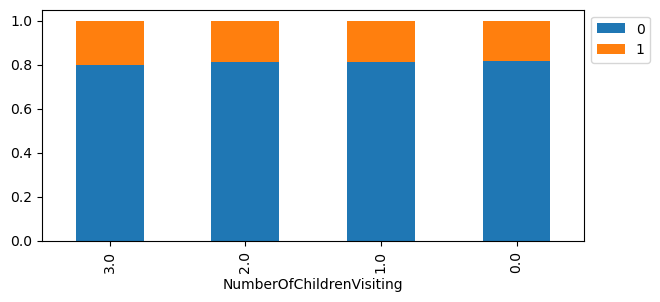

In [49]:
stacked_barplot(data,'NumberOfChildrenVisiting','ProdTaken')

* Number of children accompaning customer doesn't have much impact on customers buying tour package

#### Designation vs ProdTaken

ProdTaken          0    1   All
Designation                    
All             3853  894  4747
Executive       1260  540  1800
Manager         1486  198  1684
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324
------------------------------------------------------------------------------------------------------------------------


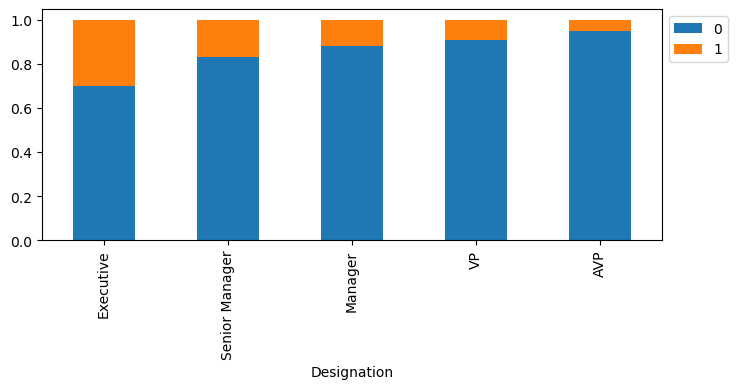

In [50]:
stacked_barplot(data,'Designation','ProdTaken')

* Executives and senior managers bought more tour package than other customers

#### Age vs ProdTaken

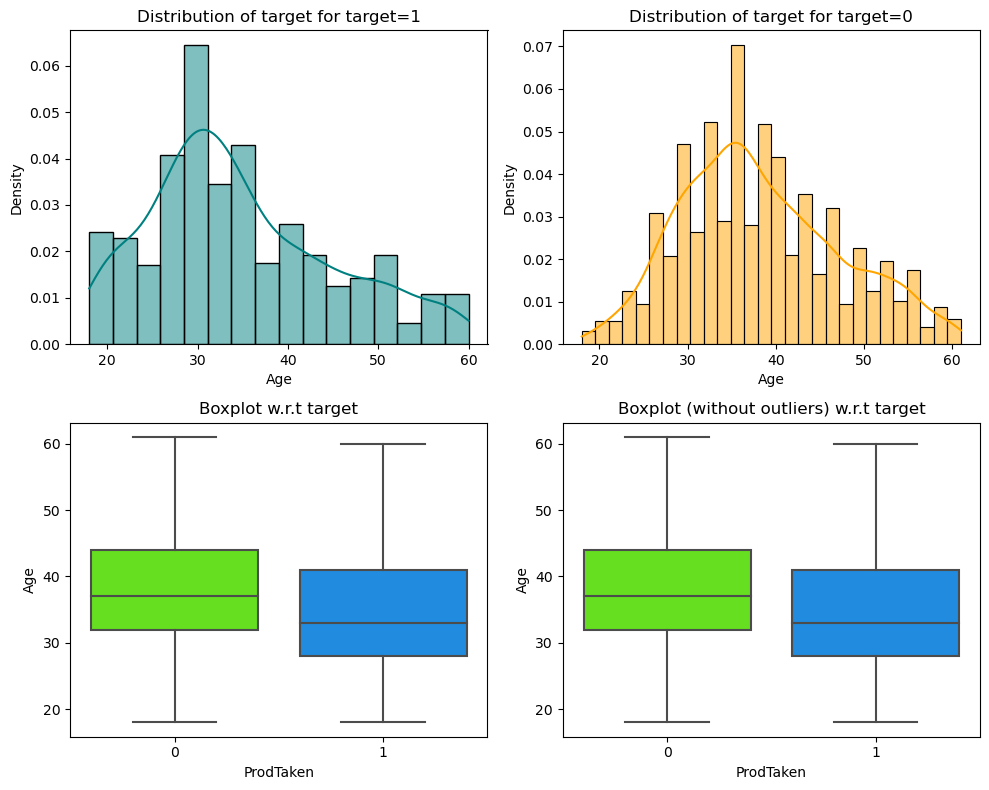

In [51]:
distribution_plot_wrt_target(data,'Age','ProdTaken')

* Younger customers are more likely to buy tour package

#### DurationOfPitch vs ProdTaken

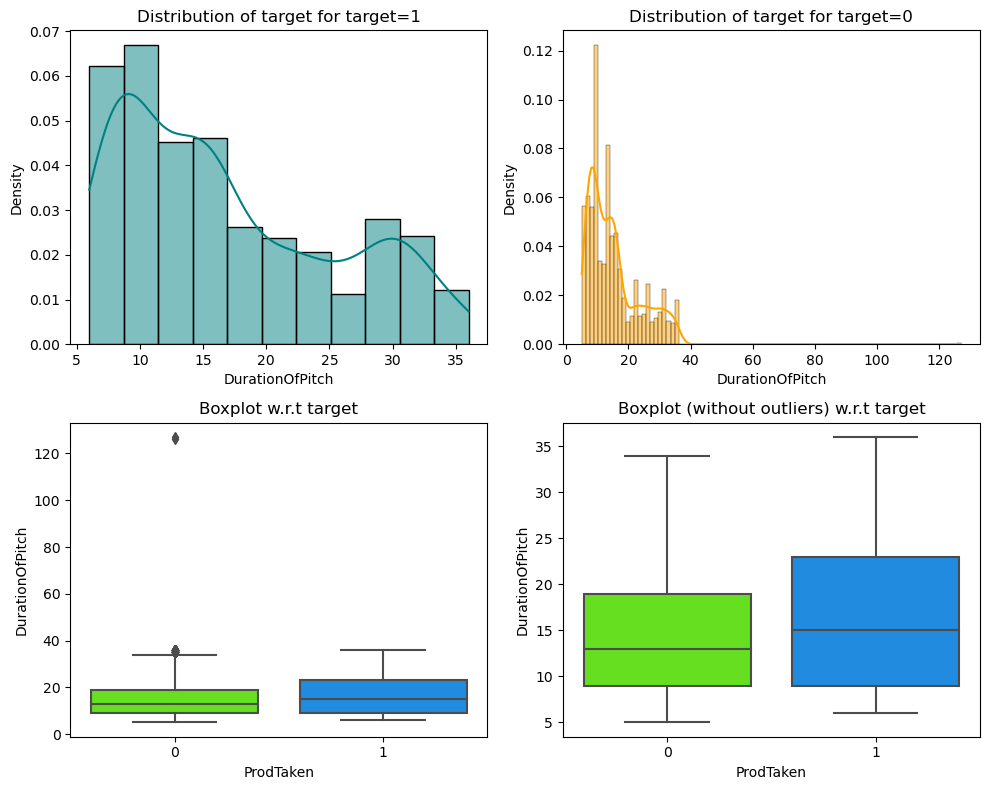

In [52]:
distribution_plot_wrt_target(data,'DurationOfPitch','ProdTaken')

* Longer Pitch Duration resulted into more customers buying Tour Package

#### NumberOfTrips vs ProdTaken

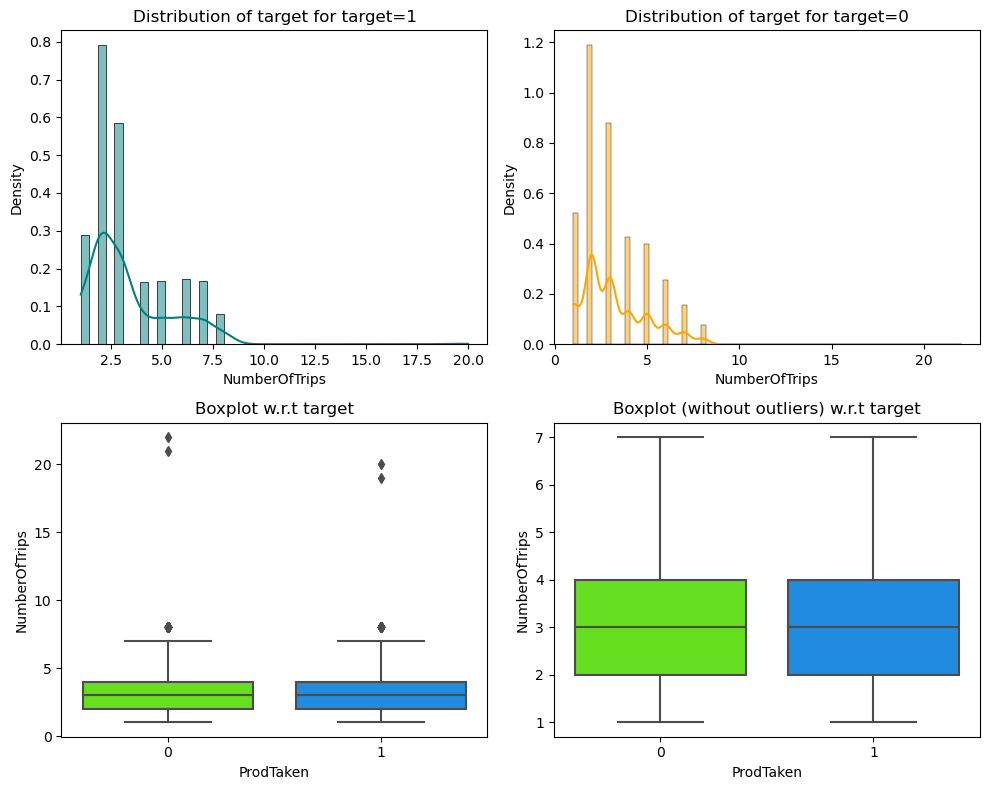

In [53]:
distribution_plot_wrt_target(data,'NumberOfTrips','ProdTaken')

* number of trips have no impact on customers buying tour package

#### MonthlyIncome vs ProdTaken

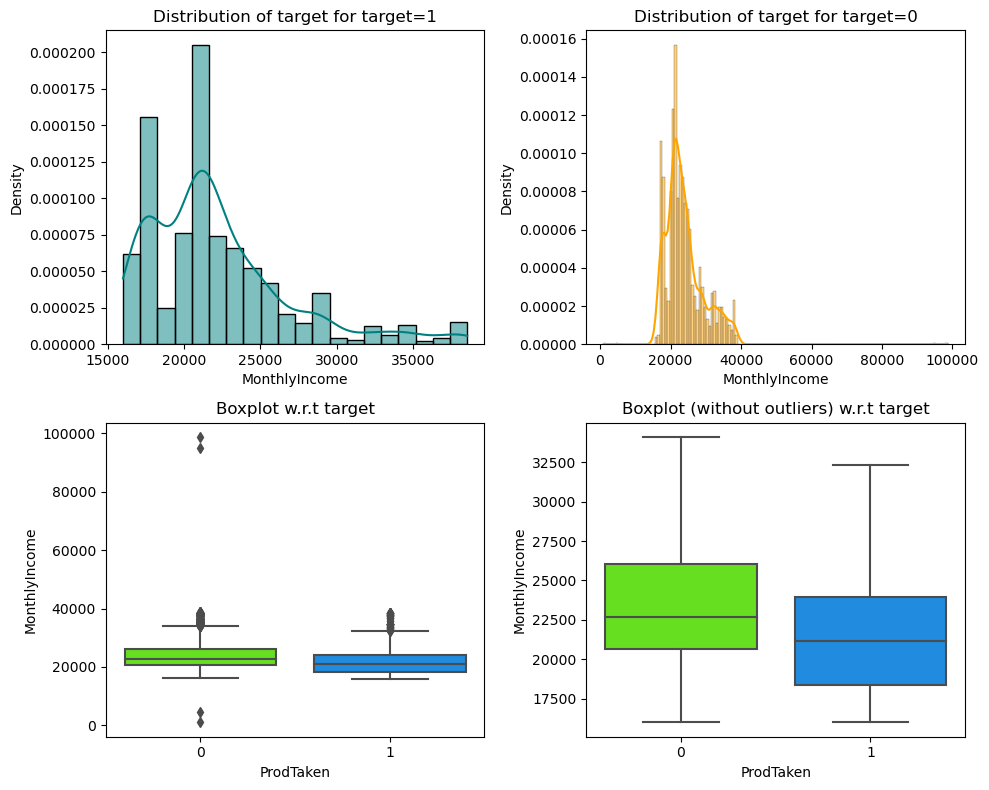

In [54]:
distribution_plot_wrt_target(data,'MonthlyIncome','ProdTaken')

* Customers with lower monthly income took more tour package

#### Product Pitched vs Age, DurationofPitch, NumberofTrips, MonthlyIncome

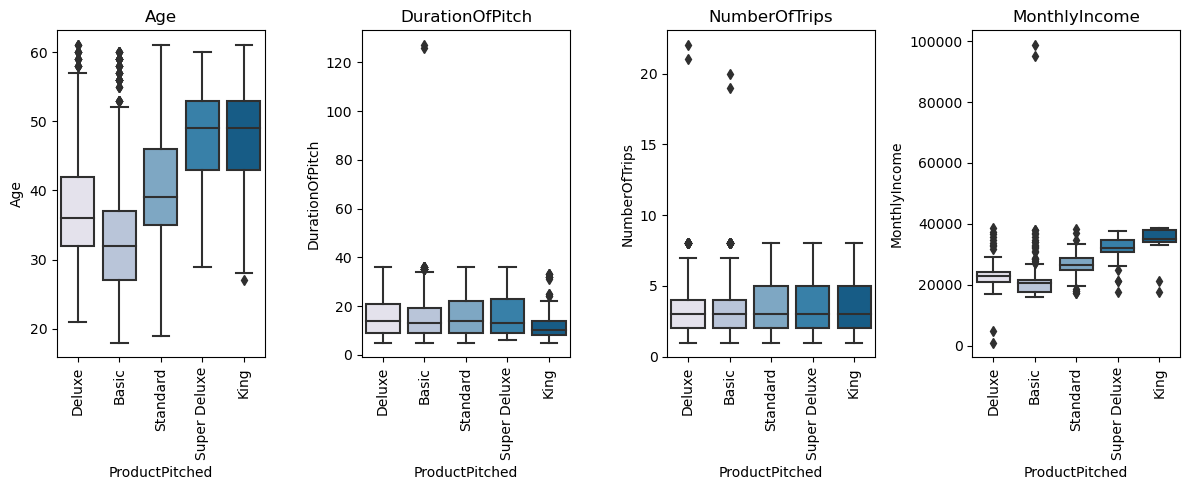

In [55]:
cols = data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,4,i+1)
                     sns.boxplot(data['ProductPitched'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.xticks(rotation=90)
                     plt.title(variable)
plt.show()

* Customers with higher age, preferred Super Deluxe and King products. Basic product was most popular amoung young customers
* Higher Income Customers preferred SUper Deluxe and King products. Basic product was popular with relatively low income customers

####  CityTier vs Age, DurationofPitch, NumberofTrips, MonthlyIncome

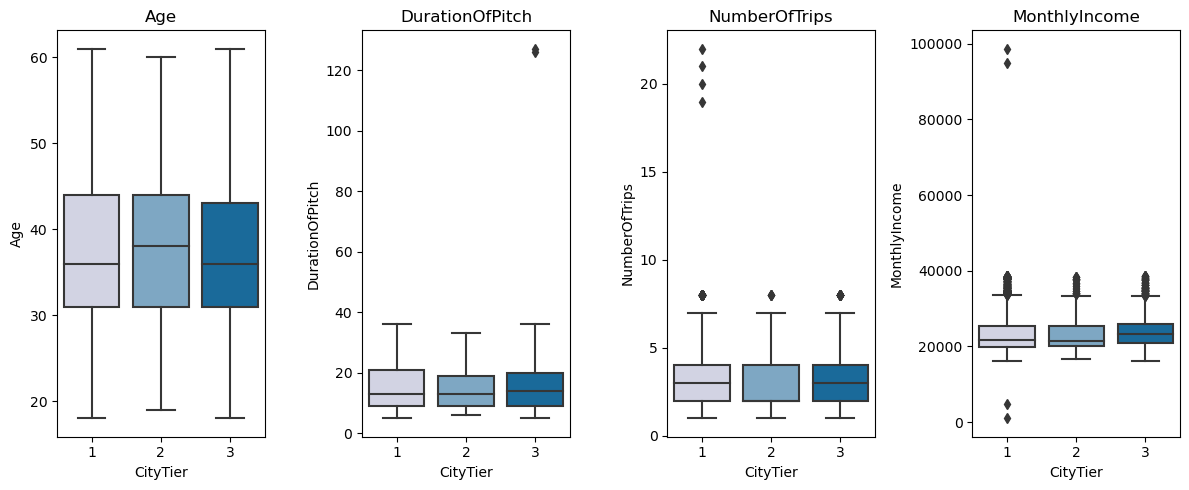

In [56]:
cols = data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,4,i+1)
                     sns.boxplot(data['CityTier'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Average age of Tier2 customers are higher than other tiers

####  Gender vs Age, DurationofPitch, NumberofTrips, MonthlyIncome

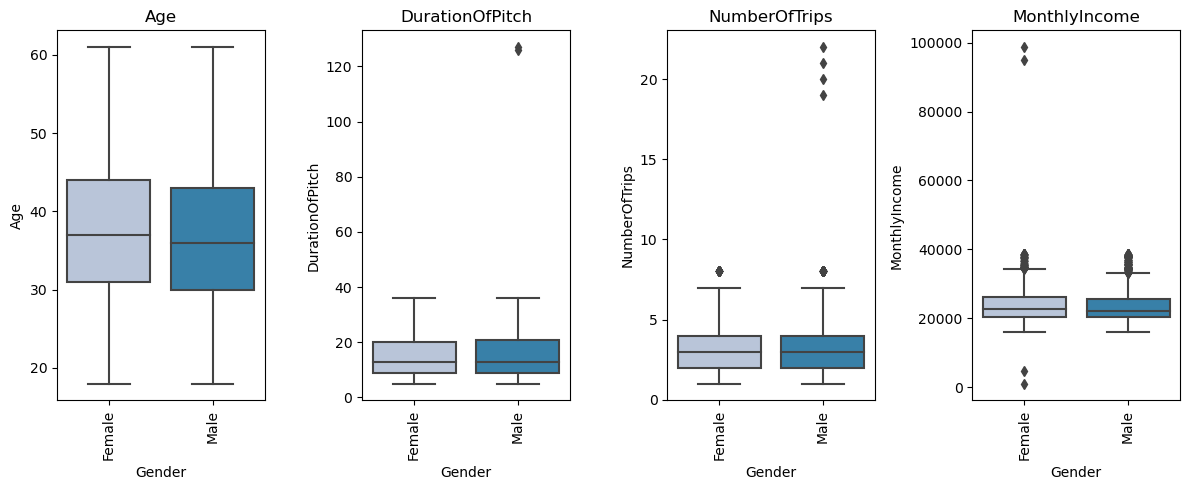

In [57]:
cols = data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,4,i+1)
                     sns.boxplot(data['Gender'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.xticks(rotation=90)
                     plt.title(variable)
plt.show()

* Female customers are slightly older than make customers

#### Designation vs Age, DurationofPitch, NumberofTrips, MonthlyIncome

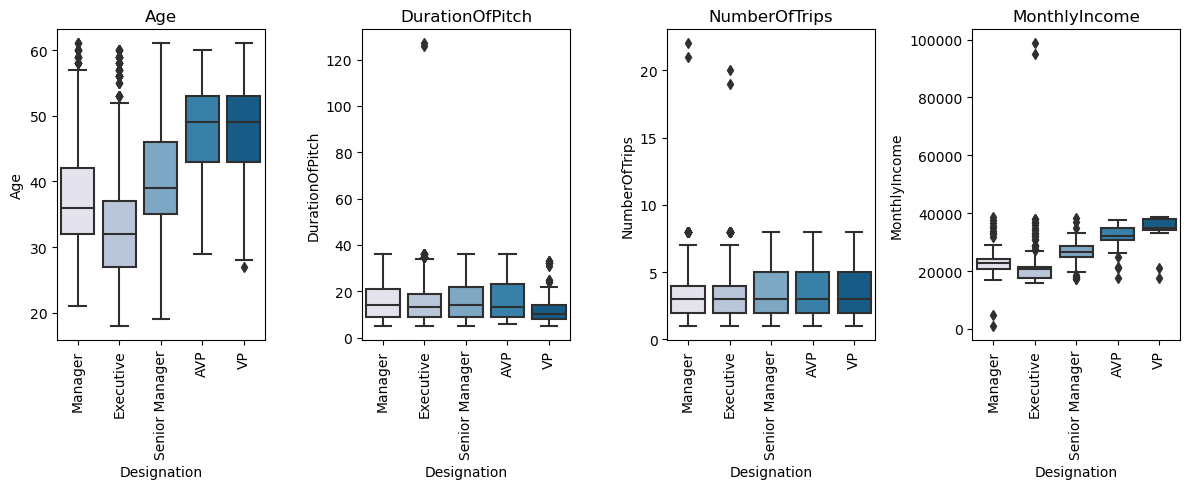

In [58]:
cols = data[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,4,i+1)
                     sns.boxplot(data['Designation'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.xticks(rotation=90)
                     plt.title(variable)
plt.show()

* AVP and VP are older customers, Executive are yougest, Managers are higher than Executives and Senior managers are higher than Managers
* SImilar trend appears to be for monthly income. Executives earn least, than Managers, followed by Senior Managers and then AVP and VP who earn most

#### Gender vs ProductPitched

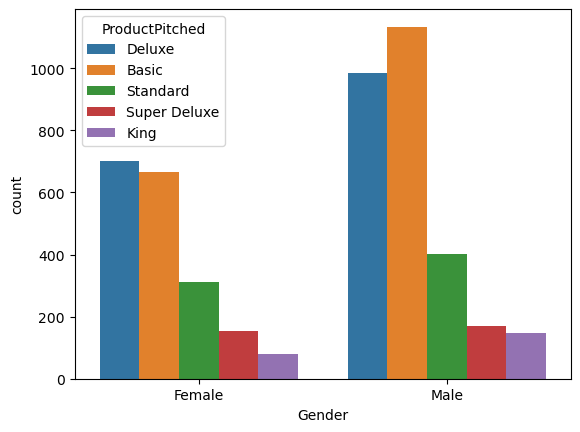

In [59]:
sns.countplot(data=data,x='Gender',hue='ProductPitched');

* Males prefer Basic, but Females prefer Deluxe

#### CityTier vs ProductPitched

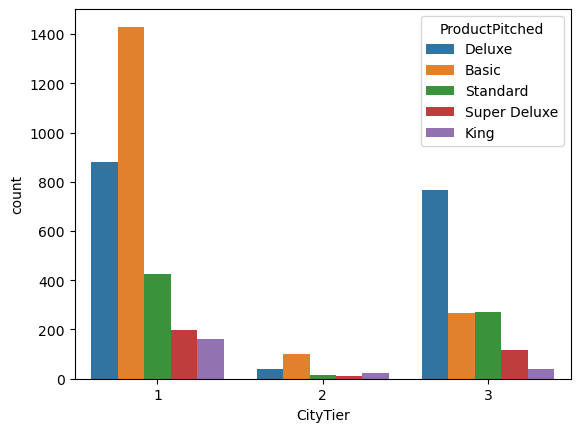

In [60]:
sns.countplot(data=data,hue='ProductPitched',x='CityTier');

* Basic product is preferred by Tier1 city, but Deluxe is preferred by Tier3

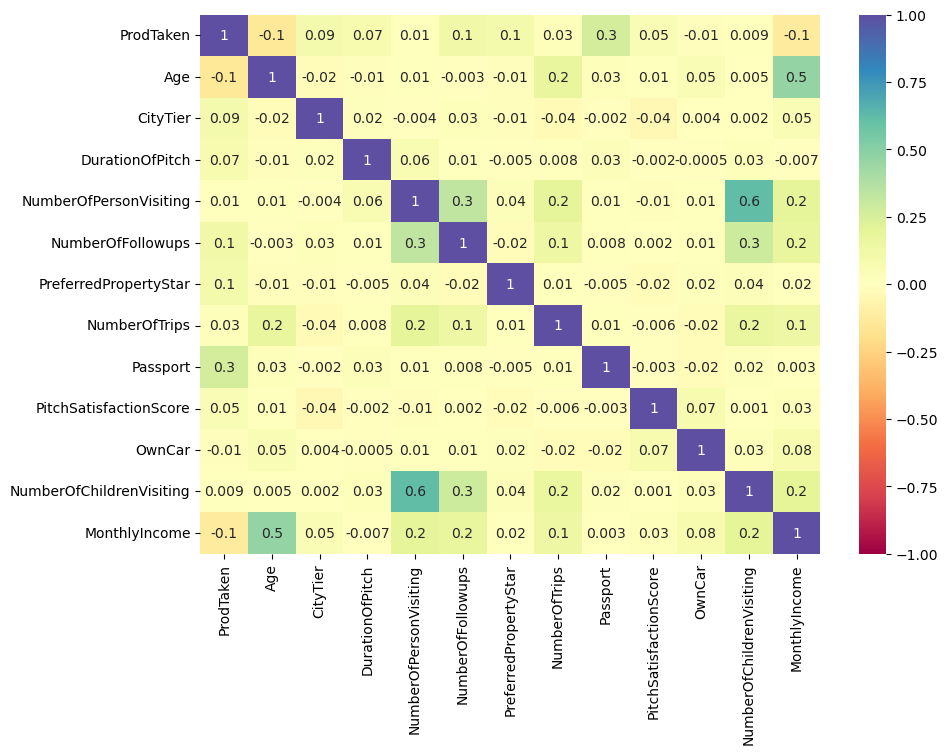

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

* Monthly Income seems to be negatively coorelated to tour package
* Number of Children Visiting and Number of Person Visiting are highly coorelated
* Age and Monthly income are coorelated

### Check for missing values

In [62]:
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             246
MonthlyIncome               224
Age                         216
NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            44
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

Check when DurationOfPitch is missing, if any other fields are missing

In [63]:
data.loc[data['DurationOfPitch'].isnull(),'MonthlyIncome'].value_counts(dropna=False)

NaN        95
19779.0     3
19876.0     3
19639.0     3
19898.0     3
           ..
19768.0     1
19614.0     1
19541.0     1
19765.0     1
19807.0     1
Name: MonthlyIncome, Length: 87, dtype: int64

In [64]:
data.loc[data['DurationOfPitch'].isnull(),'Age'].value_counts(dropna=False)

34.0    20
35.0    16
29.0    14
26.0    13
32.0    12
40.0    12
31.0    12
27.0    11
36.0    11
45.0    10
42.0    10
33.0    10
25.0     9
24.0     8
28.0     8
37.0     8
30.0     8
43.0     6
38.0     5
41.0     5
19.0     4
46.0     4
39.0     4
54.0     3
49.0     3
47.0     3
22.0     2
48.0     2
50.0     2
44.0     2
52.0     2
20.0     2
53.0     2
21.0     2
56.0     1
Name: Age, dtype: int64

In [65]:
data.loc[data['DurationOfPitch'].isnull(),'NumberOfTrips'].value_counts(dropna=False)

2.0    79
1.0    62
3.0    34
4.0    26
5.0    24
6.0    14
7.0     7
Name: NumberOfTrips, dtype: int64

In [66]:
data.loc[data['DurationOfPitch'].isnull(),'NumberOfChildrenVisiting'].value_counts(dropna=False)

1.0    106
0.0    101
2.0     36
3.0      3
Name: NumberOfChildrenVisiting, dtype: int64

In [67]:
data.loc[data['DurationOfPitch'].isnull(),'NumberOfFollowups'].value_counts(dropna=False)

3.0    145
4.0     57
5.0     20
1.0     15
2.0      7
6.0      2
Name: NumberOfFollowups, dtype: int64

In [68]:
data.loc[data['DurationOfPitch'].isnull(),'PreferredPropertyStar'].value_counts(dropna=False)

3.0    157
5.0     47
4.0     42
Name: PreferredPropertyStar, dtype: int64

From Above, it appears, when DurationOfPitch is missing, on 95 occurances MonthlyIncome is also missing, but other fields like Age, NumberOfTrips, NumberOfChildrenVisiting, NumberOfFollowups, PreferredProprotyStart are not missing. 

Lets group the data on the basis of CityTier, Gender and PreferredPropertyStar to get better idean of the average of DurationOfPitch, Age, MonthlyIncome 

In [69]:
data.groupby(['CityTier','Gender','PreferredPropertyStar'],as_index=False)[['DurationOfPitch','Age','MonthlyIncome']].mean()

,CityTier,Gender,PreferredPropertyStar,DurationOfPitch,Age,MonthlyIncome
0,1,Female,3.0,14.926975,38.173591,23532.109281
1,1,Female,4.0,15.834061,35.645570,22856.702586
2,1,Female,5.0,15.321839,39.209486,23946.640316
3,1,Male,3.0,15.693860,37.639929,23141.504401
4,1,Male,4.0,15.927835,38.568421,23110.367698
5,1,Male,5.0,14.744186,35.639053,23282.479532
6,2,Female,3.0,18.142857,41.371429,25767.714286
7,2,Female,4.0,17.642857,31.230769,20518.142857
8,2,Female,5.0,17.500000,40.200000,26896.333333
9,2,Male,3.0,11.819672,36.142857,23349.534483


In [70]:
# imputing the missing values in DurationOfPitch 
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(value=data.groupby(['CityTier','Gender','PreferredPropertyStar'])['DurationOfPitch'].transform('mean'))

In [71]:
# imputing the missing values in MonthlyIncome 
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(value=data.groupby(['CityTier','Gender','PreferredPropertyStar'])['MonthlyIncome'].transform('mean'))

In [72]:
# imputing the missing values in Age 
data['Age'] = data['Age'].fillna(value=data.groupby(['CityTier','Gender','PreferredPropertyStar'])['Age'].transform('mean'))

In [73]:
# checking the missing values again 
data.isnull().sum().sort_values(ascending=False)

NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            44
PreferredPropertyStar        26
TypeofContact                25
ProdTaken                     0
MaritalStatus                 0
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProductPitched                0
Age                           0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
DurationOfPitch               0
CityTier                      0
MonthlyIncome                 0
dtype: int64

In [74]:
# checking when NumberOfTrips are missing, if NumberOfChildrenVisiting is missing
data.loc[data['NumberOfTrips'].isnull(),'NumberOfChildrenVisiting'].value_counts(dropna=False)

2.0    64
1.0    53
3.0    21
Name: NumberOfChildrenVisiting, dtype: int64

In [75]:
# checking when NumberOfTrips are missing, if NumberOfFollowups is missing
data.loc[data['NumberOfTrips'].isnull(),'NumberOfFollowups'].value_counts(dropna=False)

4.0    97
5.0    28
2.0     7
3.0     3
6.0     3
Name: NumberOfFollowups, dtype: int64

In [76]:
# checking when NumberOfTrips are missing, if PreferredPropertyStar is missing
data.loc[data['NumberOfTrips'].isnull(),'PreferredPropertyStar'].value_counts(dropna=False)

3.0    90
5.0    30
4.0    18
Name: PreferredPropertyStar, dtype: int64

In [77]:
# checking when NumberOfTrips are missing, if TypeofContact is missing
data.loc[data['NumberOfTrips'].isnull(),'TypeofContact'].value_counts(dropna=False)

Self Enquiry       100
Company Invited     38
Name: TypeofContact, dtype: int64

In [78]:
data.groupby(['CityTier','Gender','PreferredPropertyStar'],as_index=False)[['NumberOfTrips']].median()

,CityTier,Gender,PreferredPropertyStar,NumberOfTrips
0,1,Female,3.0,3.0
1,1,Female,4.0,3.0
2,1,Female,5.0,3.0
3,1,Male,3.0,3.0
4,1,Male,4.0,3.0
5,1,Male,5.0,3.0
6,2,Female,3.0,3.0
7,2,Female,4.0,2.0
8,2,Female,5.0,2.0
9,2,Male,3.0,2.0


In [79]:
# imputing the missing values in NumberOfTrips 
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(value=data.groupby(['CityTier','Gender','PreferredPropertyStar'])['NumberOfTrips'].transform('median'))

In [80]:
# checking the missing values again 
data.isnull().sum().sort_values(ascending=False)

NumberOfChildrenVisiting    60
NumberOfFollowups           44
PreferredPropertyStar       26
TypeofContact               25
ProdTaken                    0
MaritalStatus                0
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
ProductPitched               0
Age                          0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
MonthlyIncome                0
dtype: int64

In [81]:
data[data['NumberOfChildrenVisiting'].isnull()]['PreferredPropertyStar'].value_counts()

3.0    27
4.0    17
5.0    16
Name: PreferredPropertyStar, dtype: int64

In [82]:
# imputing the missing values in NumberOfChildrenVisiting 
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0])

In [83]:
# checking the missing values again 
data.isnull().sum().sort_values(ascending=False)

NumberOfFollowups           44
PreferredPropertyStar       26
TypeofContact               25
ProdTaken                    0
MaritalStatus                0
Designation                  0
NumberOfChildrenVisiting     0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
ProductPitched               0
Age                          0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
MonthlyIncome                0
dtype: int64

In [84]:
data[['NumberOfFollowups','PreferredPropertyStar','TypeofContact']].mode().T

,0
NumberOfFollowups,4.0
PreferredPropertyStar,3.0
TypeofContact,Self Enquiry


In [85]:
# imputing the missing values in NumberOfFollowups 
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0])

In [86]:
# imputing the missing values in PreferredPropertyStar 
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0])

In [87]:
# imputing the missing values in TypeofContact 
data['TypeofContact'] = data['TypeofContact'].fillna(data['TypeofContact'].mode()[0])

In [88]:
# checking the missing values again 
data.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

### Outlier Detection and Treatment

In [89]:
num_cols = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']

# to find the 25th percentile and 75th percentile for the numerical columns
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)

#Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((data[num_cols] < lower_whisker) | (data[num_cols] > upper_whisker)).sum()/data.shape[0]*100

Age                0.000000
DurationOfPitch    2.275121
NumberOfTrips      2.232989
MonthlyIncome      7.710133
dtype: float64

* MonthlyIncome have high outliers. 
* Duration Of Pitch and Number of Trips also have little outliers
* We are not going to treat outliers as they all seem valid

## Data Preprocessing

In [90]:
data=data.replace({"TypeofContact":{"Self Enquiry":1,"Company Invited":0}})
data=data.replace({"Gender":{"Male":1,"Female":0}})

In [91]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,Salaried,0,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,0,1,14.0,Salaried,1,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,1,1,8.0,Free Lancer,1,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,0,1,9.0,Salaried,0,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,38.568421,1,1,8.0,Small Business,1,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Preparation for Modeling

In [92]:
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [93]:
X = pd.get_dummies(X, drop_first=True)

In [94]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3322, 28) (1425, 28)


In [95]:
y.value_counts(1)

0    0.811671
1    0.188329
Name: ProdTaken, dtype: float64

In [96]:
y_test.value_counts(1)

0    0.81193
1    0.18807
Name: ProdTaken, dtype: float64

## Model evaluation criterion


**The model can make wrong predictions as:**
1. FP - predicting a customer will buy package, but in reality they do dont
2. FN - predicting a customer will not buy package, but in reality they end up buying

**Here objective is to make predictions before customer is contacted**

**Which metric to optimize?**
* we want to keep both FP and FN low as we don't want travel company to waste resources in marketing
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.884211  0.727612   0.679443  0.702703


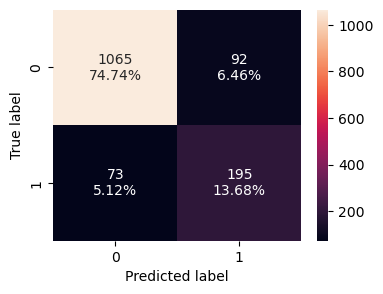

In [99]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [100]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.771222  0.744409   0.437148  0.550827
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.741754  0.66791    0.39083  0.493113


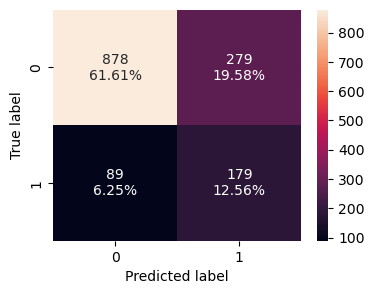

In [101]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting has reduced but the test f1-score has also decreased.
* Let's try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.905263  0.563433   0.893491  0.691076


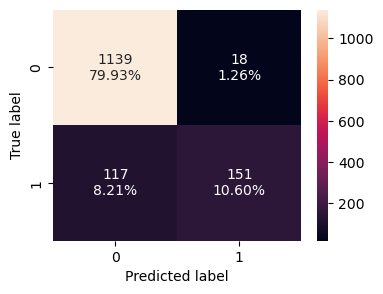

In [102]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is also overfitting the data 
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [103]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=20,
                       max_features=None, min_samples_split=12, random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0   0.97652  0.98722   0.898256  0.940639
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.890526  0.716418   0.705882  0.711111


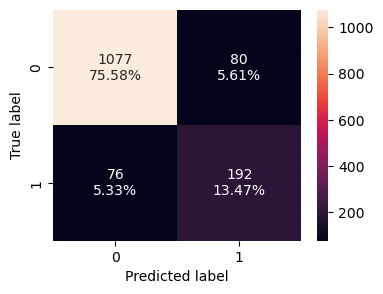

In [104]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test f1-score have increased.

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.993679  0.968051   0.998353  0.982968
   Accuracy    Recall  Precision        F1
0   0.89614  0.593284    0.80303  0.682403


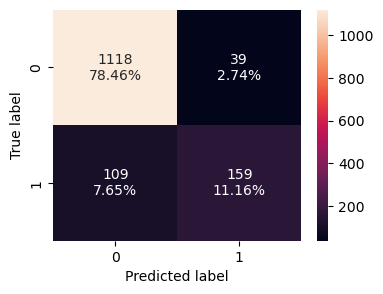

In [105]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [106]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.999097  0.995208        1.0  0.997598
   Accuracy    Recall  Precision        F1
0  0.918596  0.619403   0.922222  0.741071


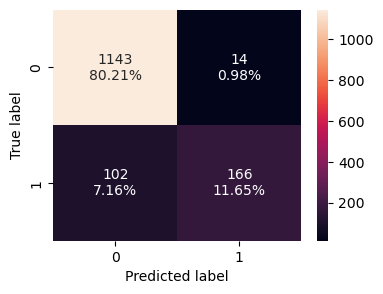

In [107]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* It is still overfitting, but F1 score is very high
* Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0   0.84708  0.333866   0.696667  0.451404
   Accuracy    Recall  Precision        F1
0  0.838596  0.283582   0.666667  0.397906


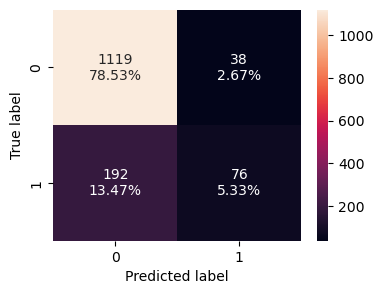

In [108]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [109]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.3000000000000003, n_estimators=90,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0  0.984949  0.940895   0.978405  0.959283
   Accuracy    Recall  Precision       F1
0  0.871579  0.567164   0.694064  0.62423


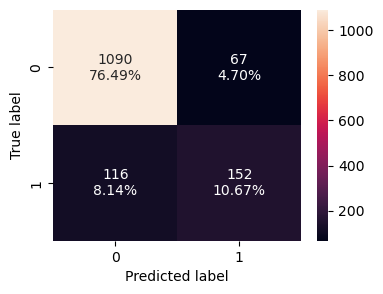

In [110]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.893739  0.504792   0.880223  0.641624
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.854737  0.391791   0.704698  0.503597


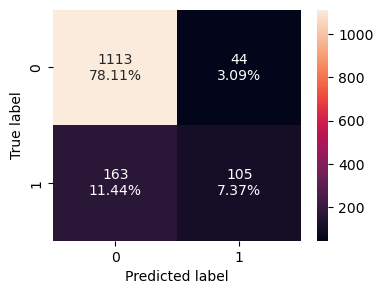

In [111]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [112]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.925346  0.65016   0.933486  0.766478
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.877193  0.488806   0.775148  0.599542


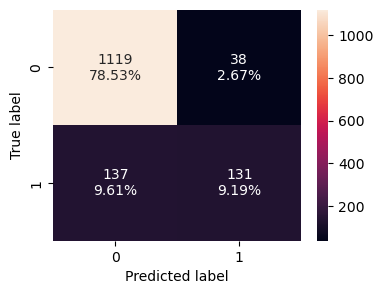

In [113]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is slight improvement in the model performance after hyperparameter tuning.

### XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.919298  0.701493   0.843049  0.765784


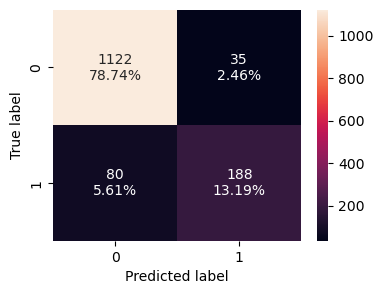

In [114]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [115]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.982541  0.998403   0.916422  0.955657
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.903158  0.794776   0.719595  0.755319


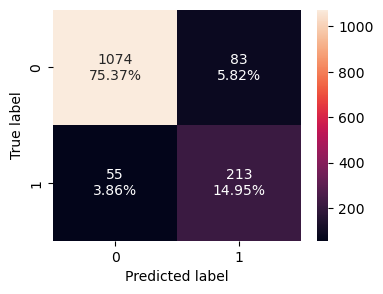

In [116]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

## Stacking Model

In [117]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=20,
                                                       max_features=None,
                                                       min_samples_split=12,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeCl...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy   Recall  Precision        F1
0  0.952438  0.98722   0.804688  0.886657
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.865263  0.847015   0.600529  0.702786


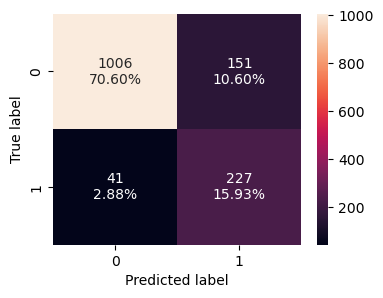

In [118]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

## Comparing all models

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Decision Tree Estimator,0.771222,0.744409,0.437148,0.550827
Random Forest Estimator,1.000000,1.000000,1.000000,1.000000
Random Forest Tuned,0.976520,0.987220,0.898256,0.940639
Bagging Classifier,0.993679,0.968051,0.998353,0.982968
Bagging Estimator Tuned,0.999097,0.995208,1.000000,0.997598
Adaboost Classifier,0.847080,0.333866,0.696667,0.451404
Adabosst Classifier Tuned,0.984949,0.940895,0.978405,0.959283
Gradient Boost Classifier,0.893739,0.504792,0.880223,0.641624
Gradient Boost Classifier Tuned,0.925346,0.650160,0.933486,0.766478


In [120]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,0.884211,0.727612,0.679443,0.702703
Decision Tree Estimator,0.741754,0.667910,0.390830,0.493113
Random Forest Estimator,0.905263,0.563433,0.893491,0.691076
Random Forest Tuned,0.890526,0.716418,0.705882,0.711111
Bagging Classifier,0.896140,0.593284,0.803030,0.682403
Bagging Estimator Tuned,0.918596,0.619403,0.922222,0.741071
Adaboost Classifier,0.838596,0.283582,0.666667,0.397906
Adabosst Classifier Tuned,0.871579,0.567164,0.694064,0.624230
Gradient Boost Classifier,0.854737,0.391791,0.704698,0.503597
Gradient Boost Classifier Tuned,0.877193,0.488806,0.775148,0.599542


* The majority of the models are overfitting the training data in terms of f1-score.
* The XGBoost classifier is giving the highest f1-score on the test data but is overfitting the training data.
* Stacking classifier is giving better generalized score and good F1 score at the same time

### Feature importance of Tuned Random Forest

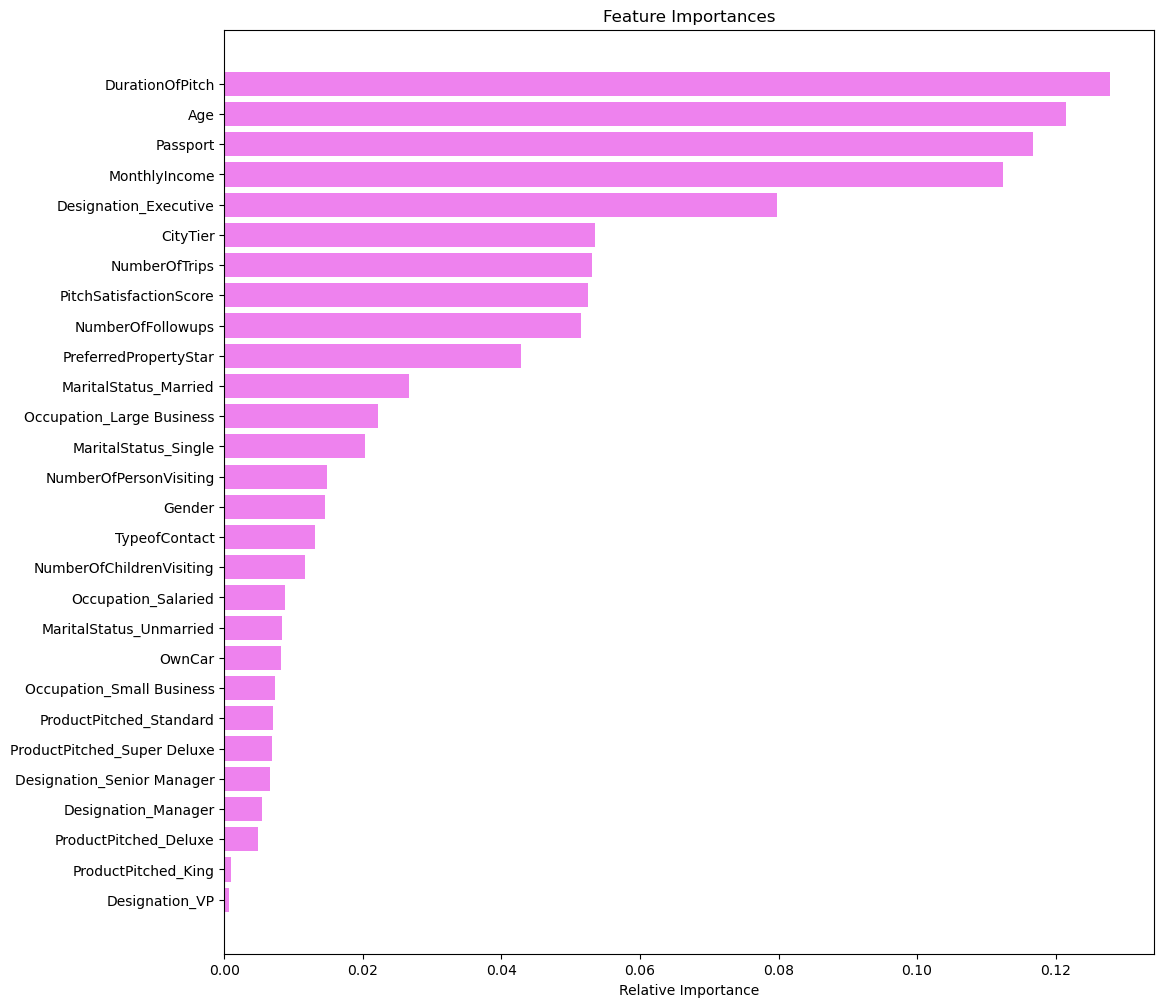

In [121]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Top 5 features which are important are DUration of Pitch, Age, Passport, Monthly Income, Designation Executive

## Conclusions and Recommendations

Customer Profile - who purchased the package and Recommendations
* Even though Self-Enquiry was preferred mode of contact but Company invited Customers took more tour package
* Customers living in Tier2 and Tier 3 are more likely to take tour package
* Large Business Owners are more likely to take tour package
* Customers with higher follow ups are more likely to take tour package
* Customers are more likely to purchase tour package for Basic, Standard and Deluxe products
* Customers who gave higher property rating are more likely to take tour package
* Single and Unmarried customers are more likely to take tour package
* Customers with Passport are more likely to take tour package
* Executives and Senior Managers designation are more likely to take tour package
* Younger customers are more likely to take tour package
* Lesser Income customers are more likely to take tour package

Product Analysis
* Customers with higher age, preferred Super Deluxe and King products. Basic product was most popular among young customers
* Higher Income Customers preferred Super Deluxe and King products. Basic product was popular with relatively low income customers
* Basic product is preferred by Tier1 city, but Deluxe is preferred by Tier3
* Males prefer Basic, but Females prefer Deluxe